In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Завантаження датасету Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворення даних
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Нормалізація даних
x_train, x_test = x_train / 255.0, x_test / 255.0

# Створення простої CNN моделі
simple_cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компіляція моделі
simple_cnn_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Навчання моделі
simple_cnn_history = simple_cnn_model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

# Збереження моделі та історії навчання
simple_cnn_model.save('simple_cnn_model.h5')
np.save('simple_cnn_history.npy', simple_cnn_history.history)

Epoch 1/10
188/188 [==============================] - 40s 207ms/step - loss: 0.8092 - accuracy: 0.7092 - val_loss: 0.4822 - val_accuracy: 0.8218
Epoch 2/10
188/188 [==============================] - 39s 209ms/step - loss: 0.4974 - accuracy: 0.8200 - val_loss: 0.4026 - val_accuracy: 0.8530
Epoch 3/10
188/188 [==============================] - 39s 206ms/step - loss: 0.4309 - accuracy: 0.8447 - val_loss: 0.3619 - val_accuracy: 0.8669
Epoch 4/10
188/188 [==============================] - 37s 196ms/step - loss: 0.3946 - accuracy: 0.8584 - val_loss: 0.3359 - val_accuracy: 0.8758
Epoch 5/10
188/188 [==============================] - 38s 205ms/step - loss: 0.3663 - accuracy: 0.8687 - val_loss: 0.3217 - val_accuracy: 0.8864
Epoch 6/10
188/188 [==============================] - 38s 203ms/step - loss: 0.3428 - accuracy: 0.8760 - val_loss: 0.3046 - val_accuracy: 0.8878
Epoch 7/10
188/188 [==============================] - 38s 203ms/step - loss: 0.3281 - accuracy: 0.8817 - val_loss: 0.2985 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import matplotlib.pyplot as plt

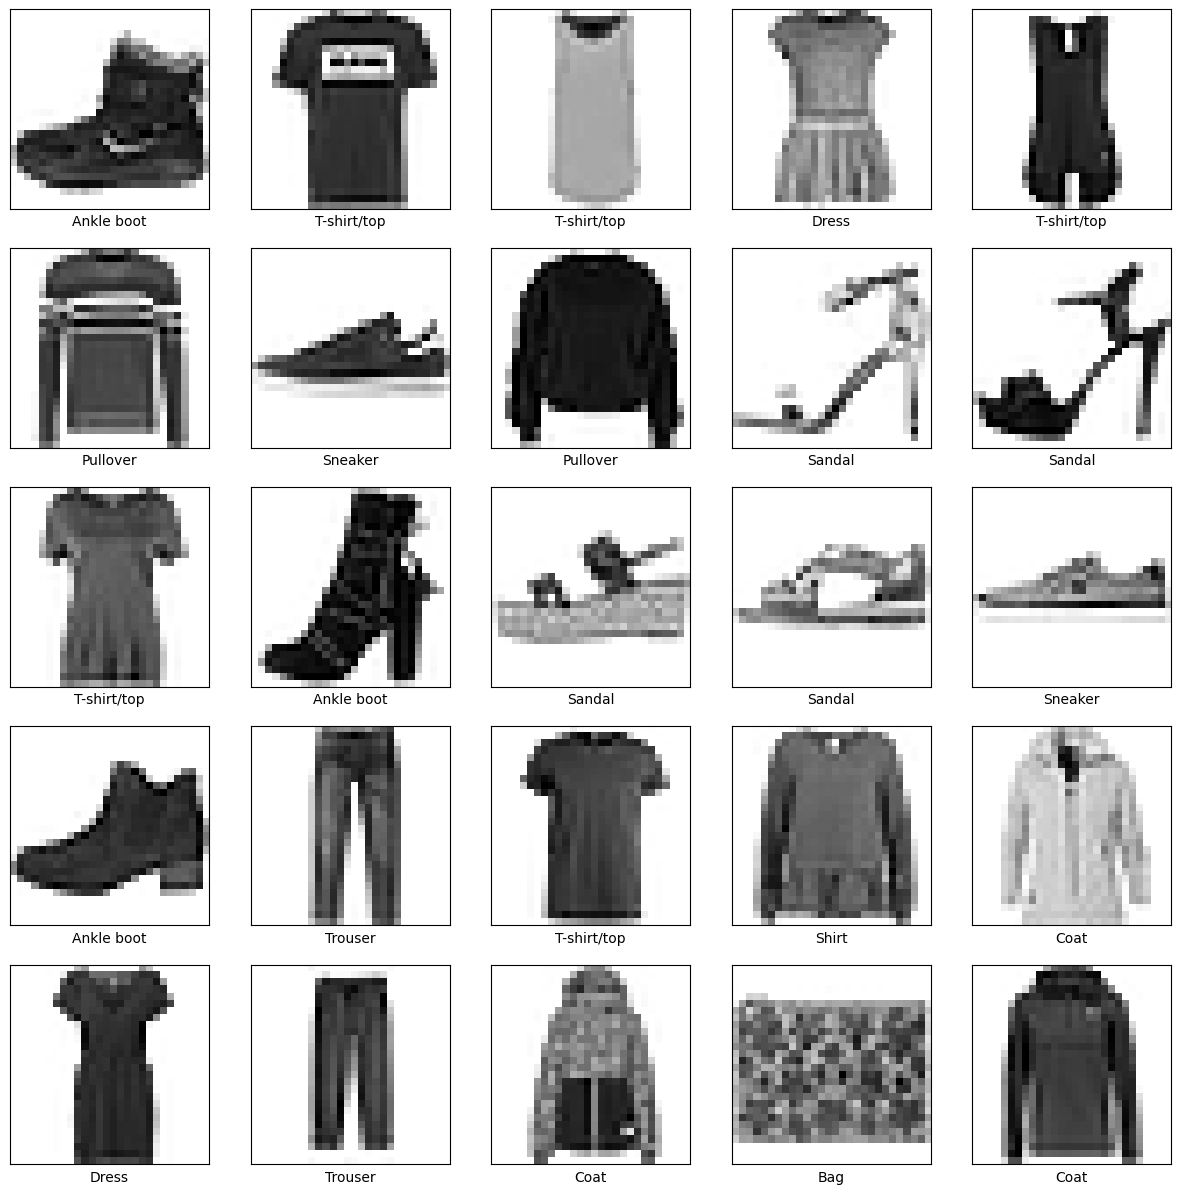

In [15]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [17]:
predict_x=simple_cnn_model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 3s 9ms/step


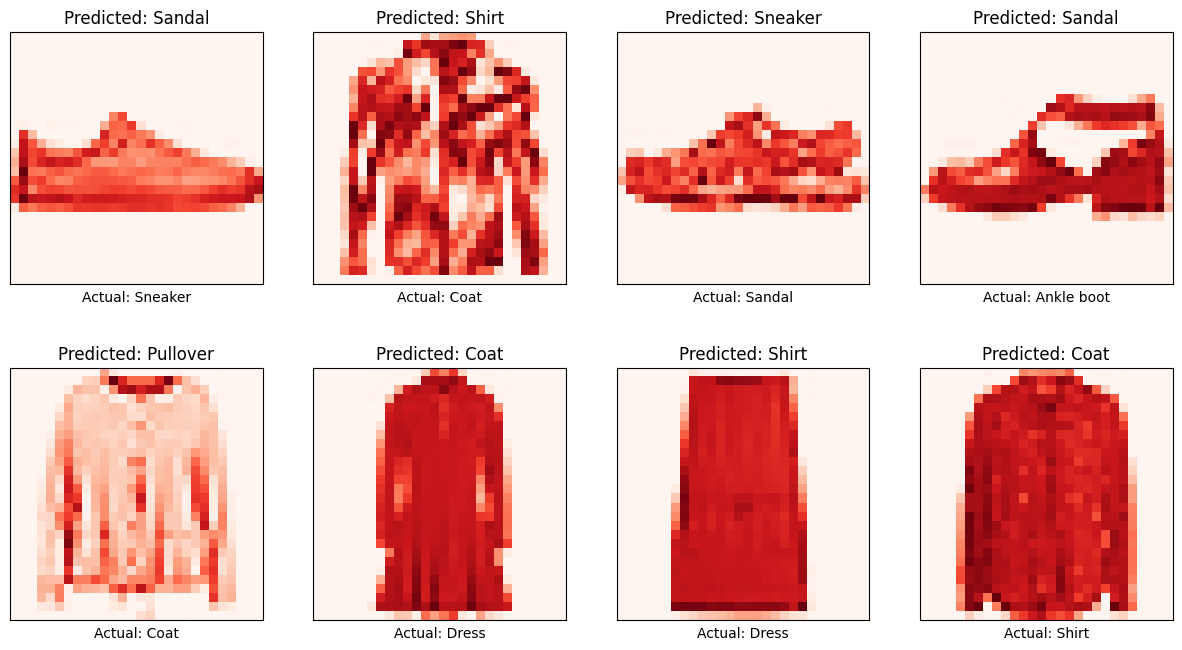

In [20]:
incorrect = np.nonzero(classes_x!=y_test)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[classes_x[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))

In [21]:
simple_cnn_model.save('simple_cnn_model.h5')
np.save('simple_cnn_history.npy', simple_cnn_history.history)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [82]:
image = Image.open('/content/trousers.jpg')
image = image.convert('L')
image = ImageOps.invert(image)
image = image.resize((28,28))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0
class_x = simple_cnn_model.predict(image)
predict_x=np.argmax(class_x,axis=1)
for i in predict_x:
    print(class_names[i])

1/1 [==============================] - 0s 24ms/step
Trouser


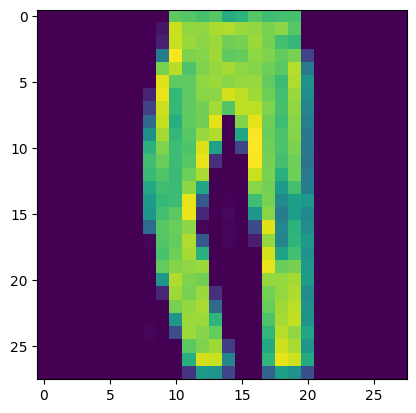

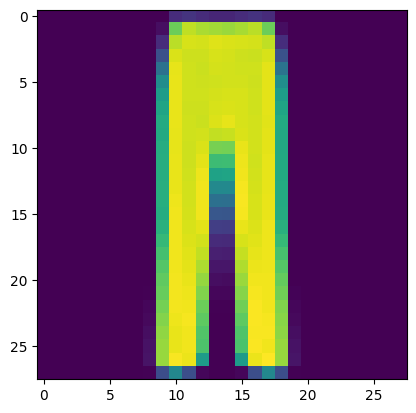

In [76]:
plt.imshow(x_test[5], interpolation='nearest')
plt.show()
plt.imshow(image[0], interpolation='nearest')
plt.show()